In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address', 'Longitude', 'Latitude'], axis=1)
x.head()
colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):

            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [
                    np.linalg.norm(
                        featureset-self.centroids[centroid]
                    ) for centroid in self.centroids
                ]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(
                    self.classifications[classification], axis=0
                )
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [
            np.linalg.norm(
                data-self.centroids[centroid]
            ) for centroid in self.centroids
        ]

        classification = distances.index(min(distances))

        return classification

In [3]:
X_train, testSet = train_test_split(x, test_size=0.2)

In [4]:
x_array = np.array(X_train)
print(x_array)

[[3.26086957e-03 3.73043478e-02 1.25217391e-02 4.82608696e-01
  2.52608696e+01 1.86956522e+01]
 [3.47619048e-03 1.66190476e-02 1.31904762e-02 3.52380952e-01
  2.10000000e+01 1.30476190e+01]
 [6.81250000e-03 4.50625000e-02 1.05625000e-02 6.43750000e-01
  9.67500000e+01 6.02500000e+01]
 ...
 [3.66666667e-03 1.77333333e-02 3.87333333e-02 4.00000000e-01
  5.92000000e+01 1.10000000e+01]
 [5.27272727e-03 2.87272727e-02 2.85454545e-02 3.72727273e-01
  3.00909091e+01 1.74545455e+01]
 [3.00000000e-03 4.25000000e-02 2.06500000e-02 6.45000000e-01
  3.58000000e+01 2.44500000e+01]]


In [5]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.2826087 , 0.52173913, 0.14750102, 0.22826087, 0.00761215,
        0.01997531],
       [0.30952381, 0.17698413, 0.15687583, 0.06547619, 0.00637706,
        0.01424708],
       [0.7265625 , 0.65104167, 0.12003505, 0.4296875 , 0.02833445,
        0.06211968],
       ...,
       [0.33333333, 0.19555556, 0.51495327, 0.125     , 0.01744997,
        0.01217039],
       [0.53409091, 0.37878788, 0.37213254, 0.09090909, 0.00901221,
        0.01871658],
       [0.25      , 0.60833333, 0.2614486 , 0.43125   , 0.01066709,
        0.02581136]])

In [6]:
clf = K_Means()
clf.fit(x_scaled)

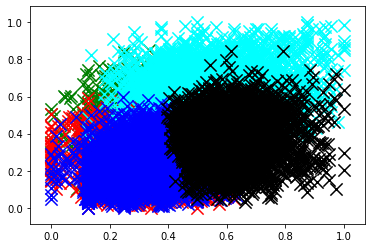

In [7]:
list_class = []
for centroid in clf.centroids:
    plt.scatter(
        clf.centroids[centroid][0], clf.centroids[centroid][1],
        marker='o', color='k', s=150, linewidths=1
    )
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(
            featureset[0], featureset[1],
            marker='x', color=color, s=150, linewidths=1
        )
        list_class.append(classification)
plt.show()

In [8]:
X_train['Cluster'] = list_class
X_train.sample()

SO2       NO2      O3      CO       PM10  PM2.5  Cluster
7072  0.006125  0.020458  0.0175  0.4875  66.708333   24.5        2

In [9]:
test_array = np.array(testSet)

In [10]:
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(test_array)
test_scaled

array([[1.25000000e-01, 6.11111111e-02, 4.28689884e-01, 1.11022302e-16,
        3.48954578e-03, 1.21012101e-02],
       [1.45833333e-01, 1.69444444e-01, 6.06550580e-01, 5.72916667e-02,
        1.34426820e-02, 1.66391639e-02],
       [1.92708333e-01, 3.56250000e-01, 1.18003731e-01, 9.37500000e-02,
        2.94760875e-03, 8.11331133e-03],
       ...,
       [4.93750000e-01, 5.62500000e-01, 2.21641791e-01, 5.06250000e-01,
        1.24989185e-02, 3.70462046e-02],
       [3.86904762e-01, 4.47619048e-01, 3.38782279e-01, 2.73809524e-01,
        1.46983898e-02, 5.18623291e-02],
       [3.69791667e-01, 3.56250000e-01, 2.09784411e-01, 2.34375000e-01,
        8.04974766e-03, 3.54785479e-02]])

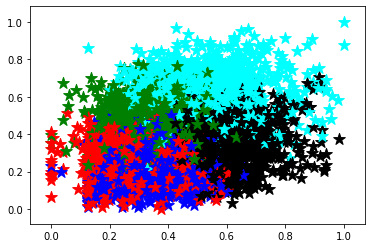

In [12]:
for clas in test_scaled:
    classification = clf.predict(clas)
    plt.scatter( clas[0], clas[1],color = colors[classification],marker='*', s=150, linewidths=1)
plt.show()